<img src="images/marman.jpg" width=400 />

# Objective

Memprediksi harga martabak manis (marman) berdasarkan diameter (cm) dan jumlah topping.
<br><br>


# Multiple Linear Regression
- Bentuk pengembangan dari *Simple Linear Regression*, dimana pada *Multiple Linear Regression* jumlah fitur masukan yang digunakan adalah lebih dari 1 fitur.
- $y_{hat}\ =\ \alpha\ +\ \beta_1x_1\ +\ \beta_2x_2\ +\ ...\ +\ \beta_n x_n$

# Sample Dataset

## Train Dataset

In [1]:
import pandas as pd

marman_train = {
    "diameter_cm" : [15, 20, 25, 30, 35],
    "n_topping": [1, 2, 3, 4, 5],
    "harga": [18_000, 25_500, 27_000, 33_000, 45_000]
}

marman_train_df = pd.DataFrame(marman_train)
marman_train_df

,diameter_cm,n_topping,harga
0,15,1,18000
1,20,2,25500
2,25,3,27000
3,30,4,33000
4,35,5,45000


In [2]:
import numpy as np

X_train = np.array(marman_train_df[["diameter_cm", "n_topping"]])
y_train = np.array(marman_train_df["harga"])

print(f"X_train:\n{X_train}\n")
print(f"y_train:\n{y_train}")

X_train:
[[15  1]
 [20  2]
 [25  3]
 [30  4]
 [35  5]]

y_train:
[18000 25500 27000 33000 45000]


### Visualize Diameter and Harga Marman with Scatter Plot

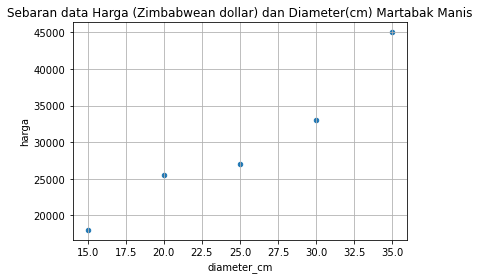

In [3]:
marman_train_df.plot(kind="scatter",
                     x="diameter_cm",
                     y="harga",
                     title="Sebaran data Harga (Zimbabwean dollar) dan Diameter(cm) Martabak Manis",
                     legend=False,
                     grid=True);

### Visualize Jumlah Topping and Harga Marman with Scatter Plot

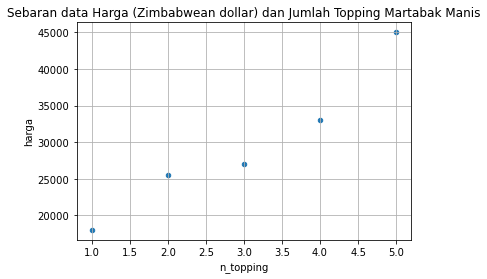

In [4]:
marman_train_df.plot(kind="scatter",
                     x="n_topping",
                     y="harga",
                     title="Sebaran data Harga (Zimbabwean dollar) dan Jumlah Topping Martabak Manis",
                     legend=False,
                     grid=True);

## Test Dataset

In [5]:
import pandas as pd

marman_test = {
    "diameter_cm" : [17, 22, 27, 35, 45],
    "n_topping": [2, 3, 4, 5, 6],
    "harga": [20_000, 25_500, 29_000, 39_000, 60_000]
}

marman_test_df = pd.DataFrame(marman_test)
marman_test_df

,diameter_cm,n_topping,harga
0,17,2,20000
1,22,3,25500
2,27,4,29000
3,35,5,39000
4,45,6,60000


In [6]:
X_test = np.array(marman_test_df[["diameter_cm", "n_topping"]])
y_test = np.array(marman_test_df["harga"])

print(f"X_test:\n{X_test}\n")
print(f"y_test:\n{y_test}")

X_test:
[[17  2]
 [22  3]
 [27  4]
 [35  5]
 [45  6]]

y_test:
[20000 25500 29000 39000 60000]


### Visualize Diameter (cm) and Harga Marman with Scatter Plot

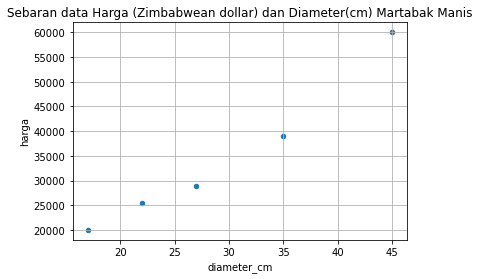

In [7]:
marman_test_df.plot(kind="scatter",
                    x="diameter_cm",
                    y="harga",
                    title="Sebaran data Harga (Zimbabwean dollar) dan Diameter(cm) Martabak Manis",
                    legend=False,
                    grid=True);

### Visualize Jumlah Topping and Harga Marman with Scatter Plot

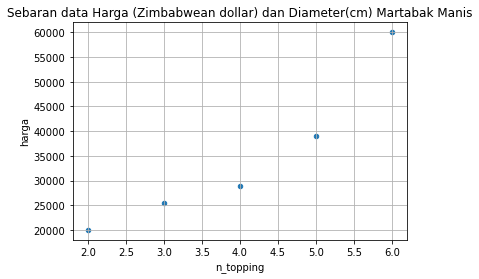

In [8]:
marman_test_df.plot(kind="scatter",
                    x="n_topping",
                    y="harga",
                    title="Sebaran data Harga (Zimbabwean dollar) dan Diameter(cm) Martabak Manis",
                    legend=False,
                    grid=True);

# Training

In [9]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

print(f"Intercept : {linear_reg_model.intercept_}")
print(f"Coef      : {linear_reg_model.coef_}")

Intercept : -576.923076923089
Coef      : [1182.69230769  236.53846154]


# Predict

In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = linear_reg_model.predict(X_test)

comp_y_test_y_pred = {
    "diameter_cm": X_test[:, 0],
    "n_topping": X_test[:, 1],
    "harga_actual": y_test,
    "harga_pred": y_pred
}

comp_y_test_y_pred_df = pd.DataFrame(comp_y_test_y_pred)
comp_y_test_y_pred_df["diff"] = abs(comp_y_test_y_pred_df["harga_actual"] - comp_y_test_y_pred_df["harga_pred"])
comp_y_test_y_pred_df

,diameter_cm,n_topping,harga_actual,harga_pred,diff
0,17,2,20000,20001.923077,1.923077
1,22,3,25500,26151.923077,651.923077
2,27,4,29000,32301.923077,3301.923077
3,35,5,39000,42000.000000,3000.000000
4,45,6,60000,54063.461538,5936.538462


# Evaluate

In [11]:
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2: {r_squared}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

R^2: 0.943970364682706
MAE: 2578.4615384615345
MSE: 11114038.46153844
